# Coursera Capstone Notebook - Week 3 - Part 3

Importing the Packages that will be used to Scrape the Data From the Weblink

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## 1. Importing the Table and converting it into a Pandas List

* <b>1.a</b> Using BeautifulSoup package to get the data from the weblink into a pandas data frame
* <b>1.b</b> Displaying the first 20 entries of the dataframe
* <b>1.c</b> Printing the size of the imported data frame

In [113]:
################
# 1.a and 1.b
################
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
Toronto_df=pd.DataFrame(df[0])
Toronto_df.head(20)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Queen's Park


Printing the size of the Imported Data Frame

In [114]:
################
# 1.c
################
print(Toronto_df.shape)

(287, 3)


## 2. Now Dropping the Rows in which the Borough is not assigned

* <b>2.a</b> Droping the entries in which the Borough is not assigned 
* <b>2.b</b> Displaying the first 20 entries of the new dataframe
* <b>2.c</b> Printing the size of the new dataframe

In [115]:
################
# 2.a and 2.b
################
Toronto_df=Toronto_df[Toronto_df.Borough != 'Not assigned']
Toronto_df=Toronto_df.reset_index(drop=True,inplace=False)
Toronto_df.head(20)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Queen's Park,Not assigned
6,M9A,Queen's Park,Queen's Park
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


Printing the size of the New Data Frame

In [116]:
################
# 2.c
################
print(Toronto_df.shape)

(210, 3)


## 3. Iterating through the data frame to update the Neighbourhood value incase it is 'Not assigned'

* <b>3.a</b> Using a for loop to iterate through the dataframe to update the values of the Neighbourhood if they are 'Not assigned'  
* <b>3.b</b> Displaying the first 20 entries of the updated dataframe

In [117]:
################
# 3.a and 3.b
################
for index,row in Toronto_df.iterrows():
    if (Toronto_df['Neighbourhood'][index]=='Not assigned'):
        Toronto_df['Neighbourhood'][index]=Toronto_df['Borough'][index] 
Toronto_df.head(20)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Queen's Park,Queen's Park
6,M9A,Queen's Park,Queen's Park
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


## 4. Combining the Neighbourhoods which have same postal code

* <b>4.a</b> Using groupby function to group the neighbourhoods which share the postal code
* <b>4.b</b> Displaying the first 20 entries of the updated dataframe
* <b>4.c</b> Printing the shape of the updated dataframe

In [118]:
################
# 4.a and 4.b
################
Toronto_df = Toronto_df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
Toronto_df.head(20)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Printing the shape of the final data frame

In [119]:
################
# 4.c
################
print(Toronto_df.shape)

(103, 3)


## 5.  Trying to find the Latitude and Longitude of the postal Codes

* <b>5.1</b> Method One: Trying Geocoder package
    * <b>5.1.a</b> Importing packages
    * <b>5.1.b</b> Calling geocoder.google
          Comments:The code got stuck in an infinite loop, Therefore importing csv file for the latitudes and longitudes.
* <b>5.2</b> Method Two:Importing CSV file
    * <b>5.2.a</b> Importing CSV file from weblink
    * <b>5.2.b</b> Preprocessing of the dataframe before merging
    * <b>5.2.c</b> Merging the two data frames
    * <b>5.2.d</b> Printing the shape of the final data frame

### 5.1 Method One:Geocoder

In [ ]:
################
# 5.1.a
################
!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder

In [ ]:
################
# 5.1.b
################
# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.google('{}, Toronto, Ontario'.format('M5G'))
    lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

### 5.2 Method Two: CSV file

In [120]:
################
# 5.2.a
################
Toronto_df_latlng = pd.read_csv('http://cocl.us/Geospatial_data', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [121]:
################
# 5.2.b
################
Toronto_df_latlng.columns = list(map(str, Toronto_df_latlng.columns))
Toronto_df_latlng.reset_index(level=0, inplace=True)
Toronto_df_latlng.rename(columns={'Postal Code':'Postcode'}, inplace=True)
Toronto_df_latlng.head(20)

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [122]:
################
# 5.2.c
################
Toronto = pd.merge(Toronto_df, Toronto_df_latlng, on='Postcode')
Toronto.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [123]:
################
# 5.2.d
################
Toronto.shape

(103, 5)

## 6. Plotting the Postcodes on a map 

* <b>6.a</b> Importing the libraries to find the coordinates of the city and to draw the map
* <b>6.b</b> Printing the number of postal addresses and the number of unique bouroughs
* <b>6.c</b> using geolocator.geocode to find the latitides and longitudes of Toronto
* <b>6.d</b> Saving the unique names of the boroughs
* <b>6.e</b> Creating a function to map boroughs to index
* <b>6.f</b> Creating a function to map index to unique color
* <b>6.g</b> Plot map of Toronto and place circle markers on all the postal codes. The fill color of the markers represent different bouroghs

In [124]:
################
# 6.a
################
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim 
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium
import numpy as np

In [125]:
################
# 6.b
################
print('The dataframe has {} postcodes and {} boroughs.'.format(
        len(Toronto['Postcode'].unique()),
        len(Toronto['Borough'].unique())      
    )
)

The dataframe has 103 postcodes and 11 boroughs.


In [126]:
################
# 6.c
################
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.653963, -79.387207.


In [127]:
################
# 6.d
################
boroghs_T=Toronto.Borough.unique()
boroghs_T

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

In [128]:
################
# 6.e
################
def indexmaping(borough_in):
    for i, val in enumerate(boroghs_T):
        if (val==borough_in):
            index=i
    return index

In [129]:
################
# 6.f
################
def colormaping(bor):
    colors_map = np.array(['blue', 'red', 'black', 'purple', 'green','pink', 'darkgray', 'beige', 'orange', 'cadetblue', 'lightred'])
    index=indexmaping(bor)
    col=colors_map[index]
    return col

In [130]:
################
# 6.g
################

# create map of New Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, post in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neighbourhood'],Toronto['Postcode']):
    label = 'Postal Code: {}, Bourogh: {}'.format(post,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color=colormaping(borough),
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

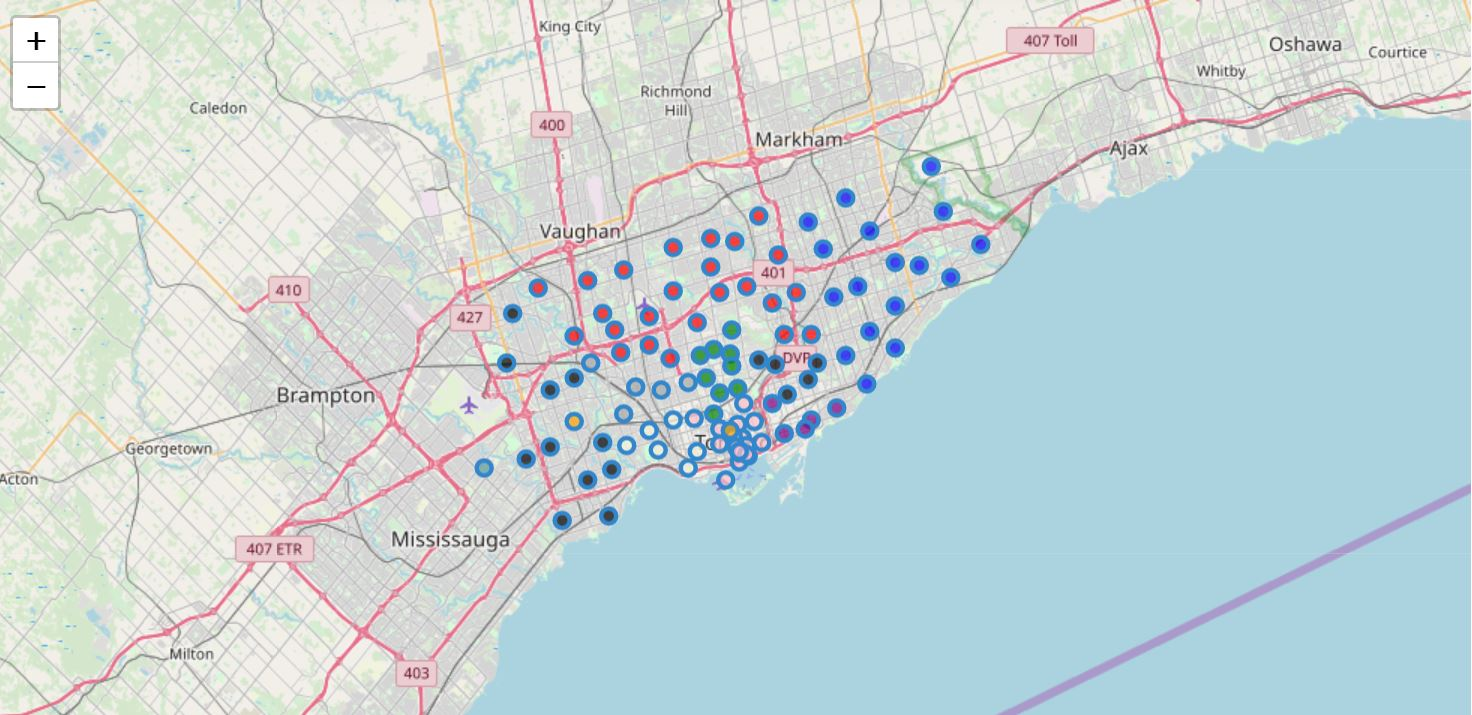

In [135]:
from IPython.display import Image
Image("Images/Map.jpg")

### Observations

* Not all the Bouroghs have the same number of Postal codes
* The distribution of postal is not uniform
* The distribultion of postal codes is denser in some areas compared to others
* Downtown Toronto as the densest postal code distribution (Represented in Pink on the graph)
* The suburbs of toronto (like Scarborough and Etobicoke) have a less dense postal code distribution compared to Downtown Toronto. 
* The postal codes belonging to the same borough are generally grouped together 